In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   float64
 2   Hour                       8760 non-null   object 
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### We have no missing values

In [8]:
df.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [11]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

## Renaming some features to make it easier while pre-processing

In [12]:
df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [13]:
df['Date']=df['Date'].astype('datetime64[ns]')

## We want to extract the months and days to make new features

In [14]:
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day_name()

## We make a new feature called 'weekend' to see if the weekend has any effect on rentals

In [15]:
df['Weekend'] = df['Day'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)

## Date and Day are not required since we have extracted all useable info from them

In [16]:
df = df.drop(['Date','Day'], axis = 1)

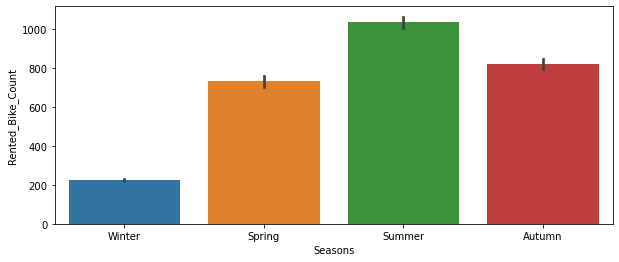

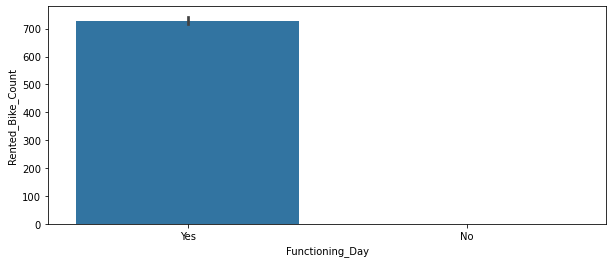

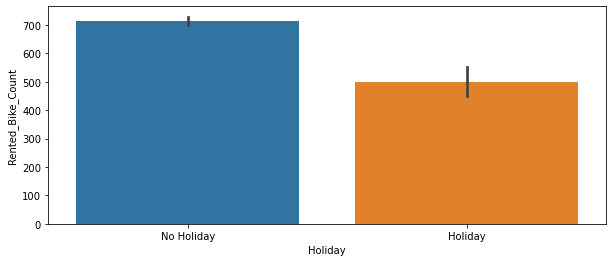

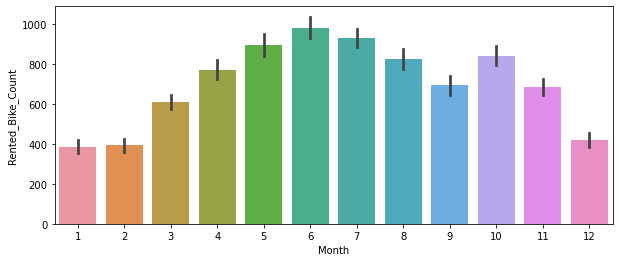

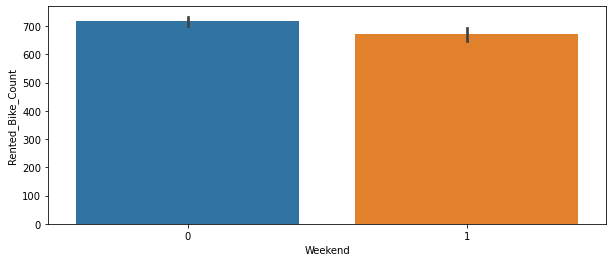

In [17]:
col_list = ['Seasons','Functioning_Day','Holiday','Month','Weekend']

for col in col_list:
    fig = plt.figure(figsize=(10, 4))
    ax = fig.gca()
    sns.barplot(x=df[col],y=df['Rented_Bike_Count'])

### We can see that Bike Rentals go up in the summer months, and again in autumn months. Rentals are least in Winters when its snowing and when its raining, as expected.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

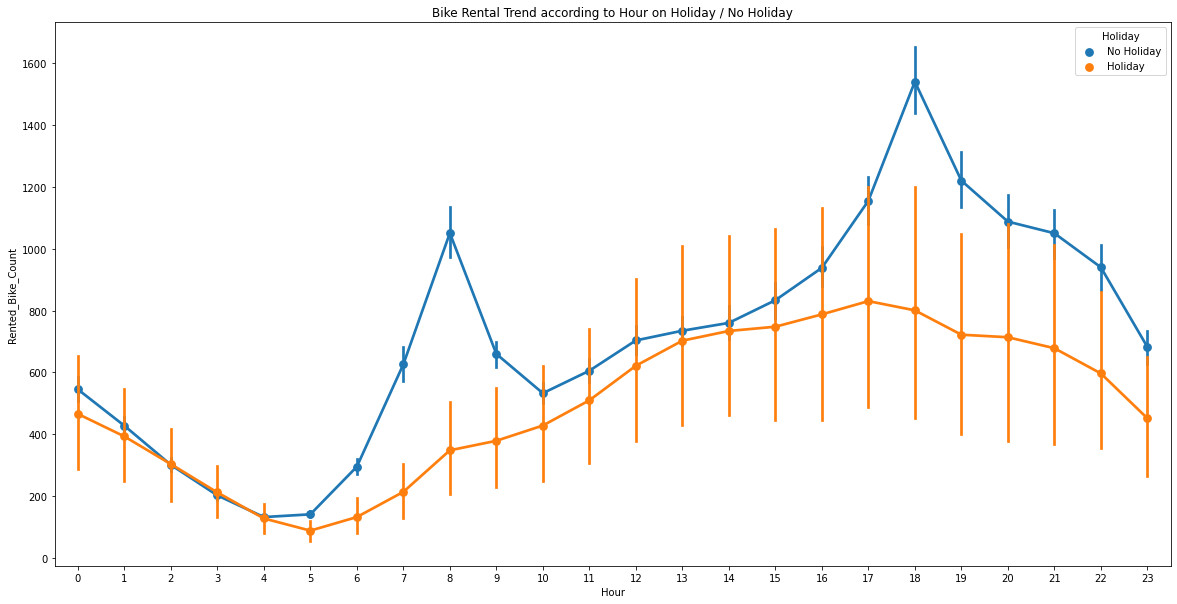

In [18]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['Hour'],y = df['Rented_Bike_Count'],hue = df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Weekend')

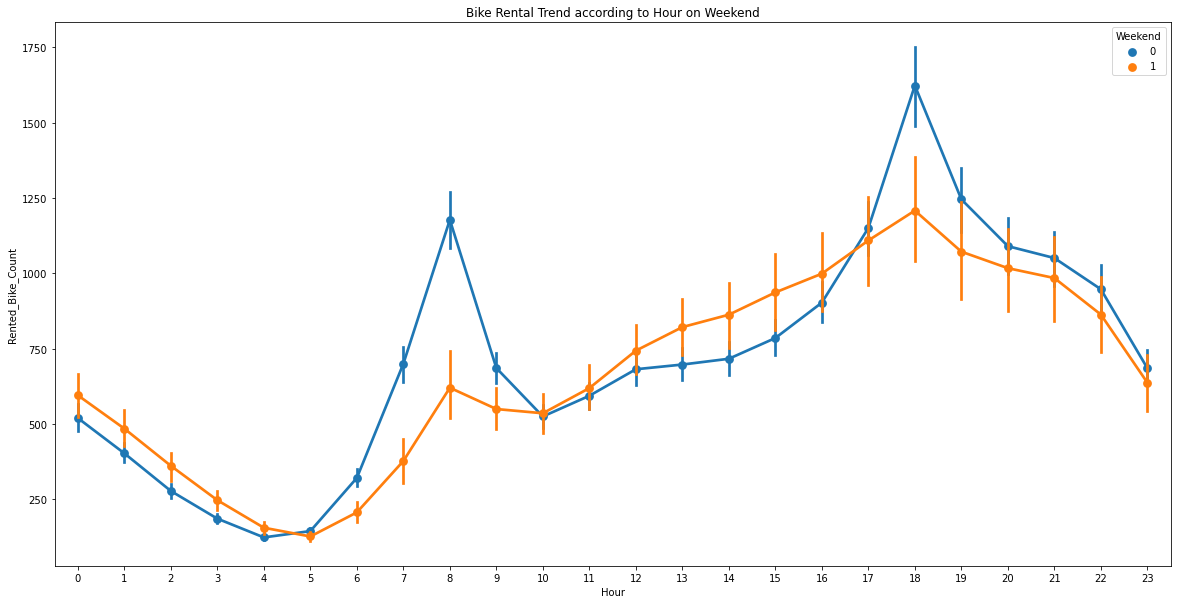

In [19]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['Hour'],y = df['Rented_Bike_Count'],hue = df['Weekend'])
plt.title("Bike Rental Trend according to Hour on Weekend")

## Bike rentals go up during 6-9 AM probably due to office/school rush hours and increase again from 5-7 PM, probably due to people returning from office and people going out for evening bike rides

In [20]:
df = df.drop('Functioning_Day',axis = 1)

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

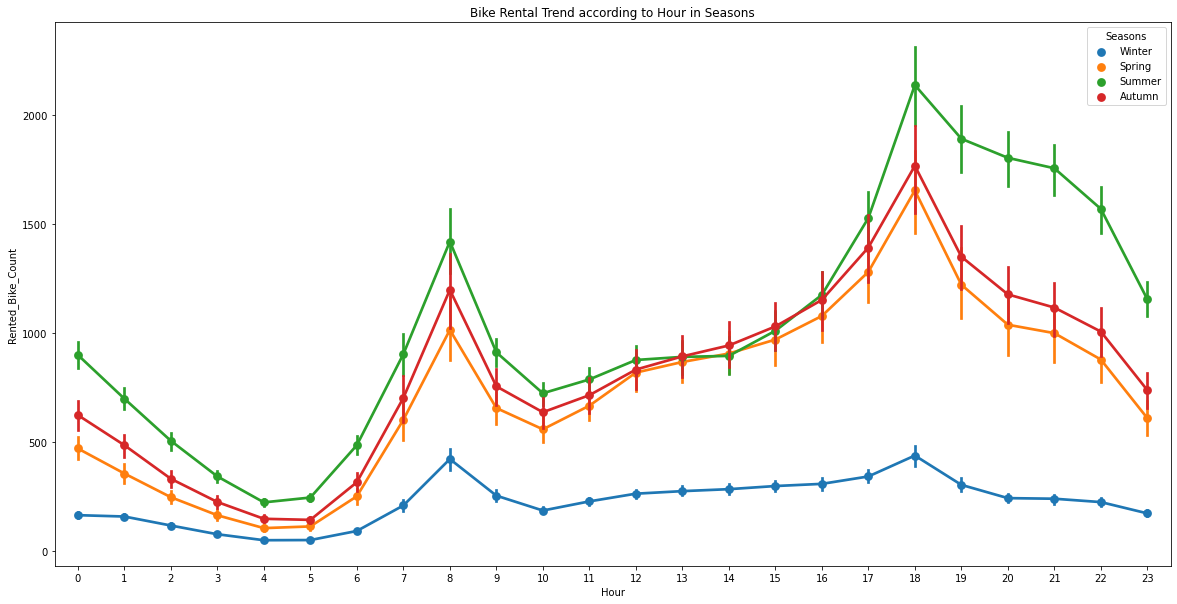

In [21]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

## In the winters, rentals are lower than the rest of the year

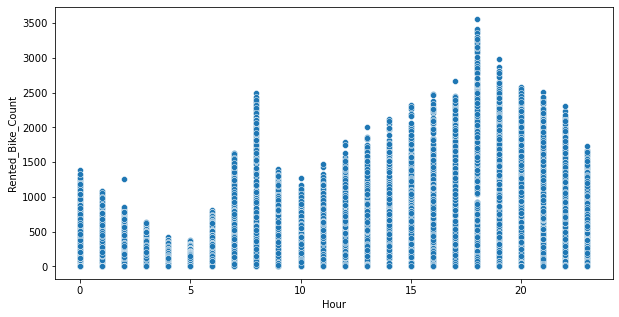

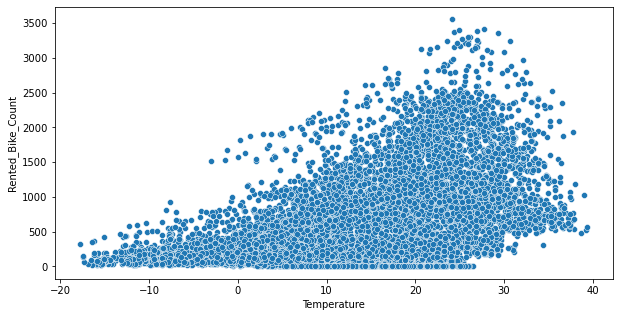

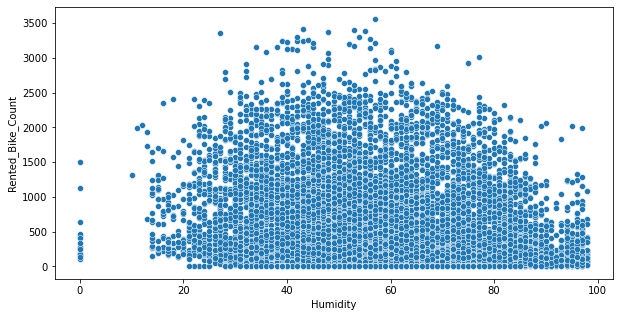

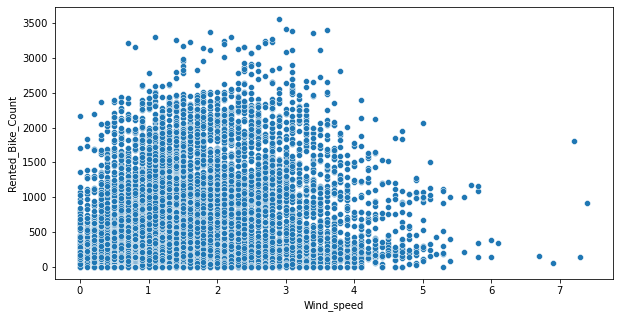

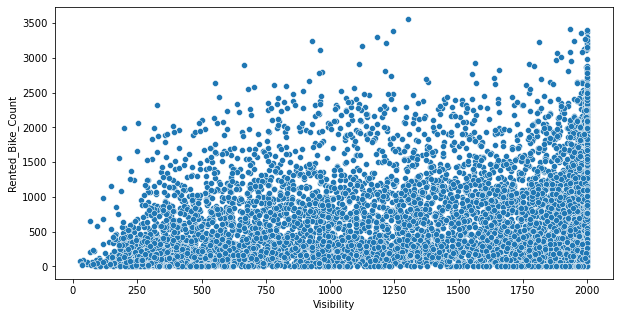

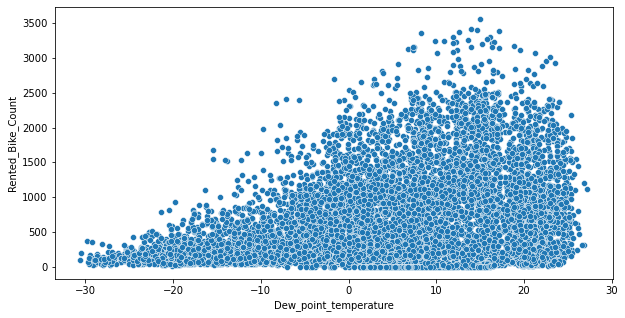

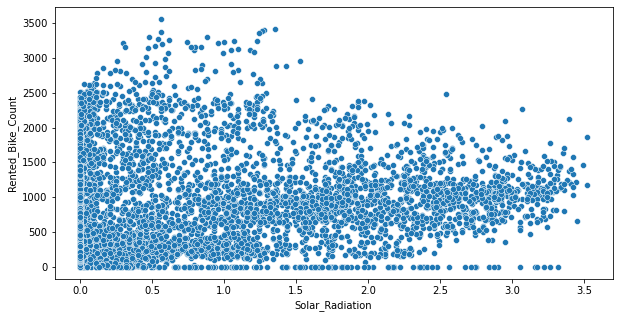

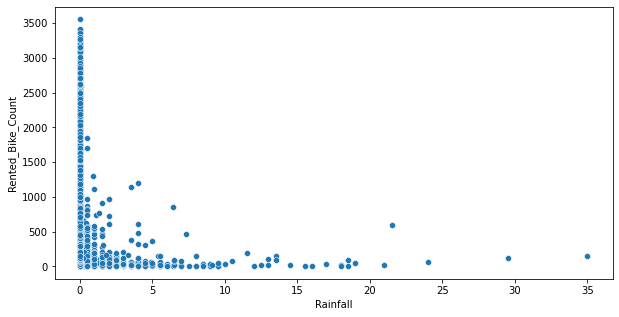

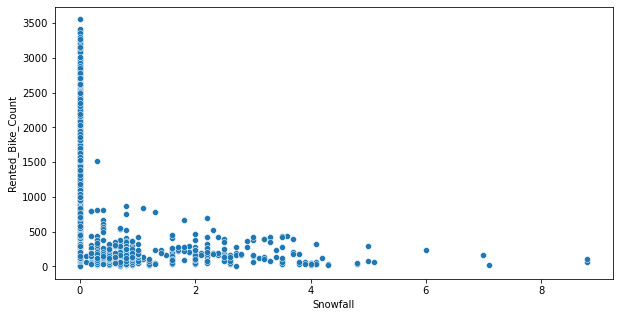

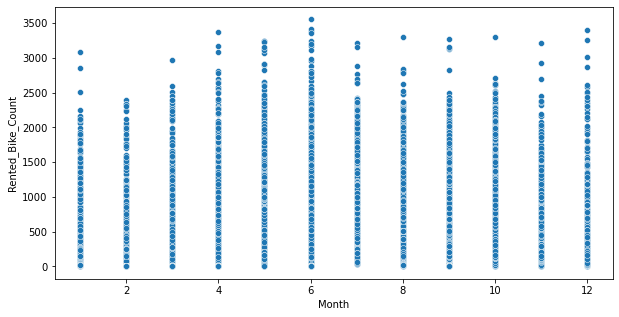

In [22]:
for col in ['Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Month']:
  plt.figure(figsize=(10,5))
  ax=fig.gca()
  sns.scatterplot(x = df[col],y = df['Rented_Bike_Count'])

## We can see there is no linearity between the continous features and target variable, but we still apply linear regression as a baseline model

<AxesSubplot:>

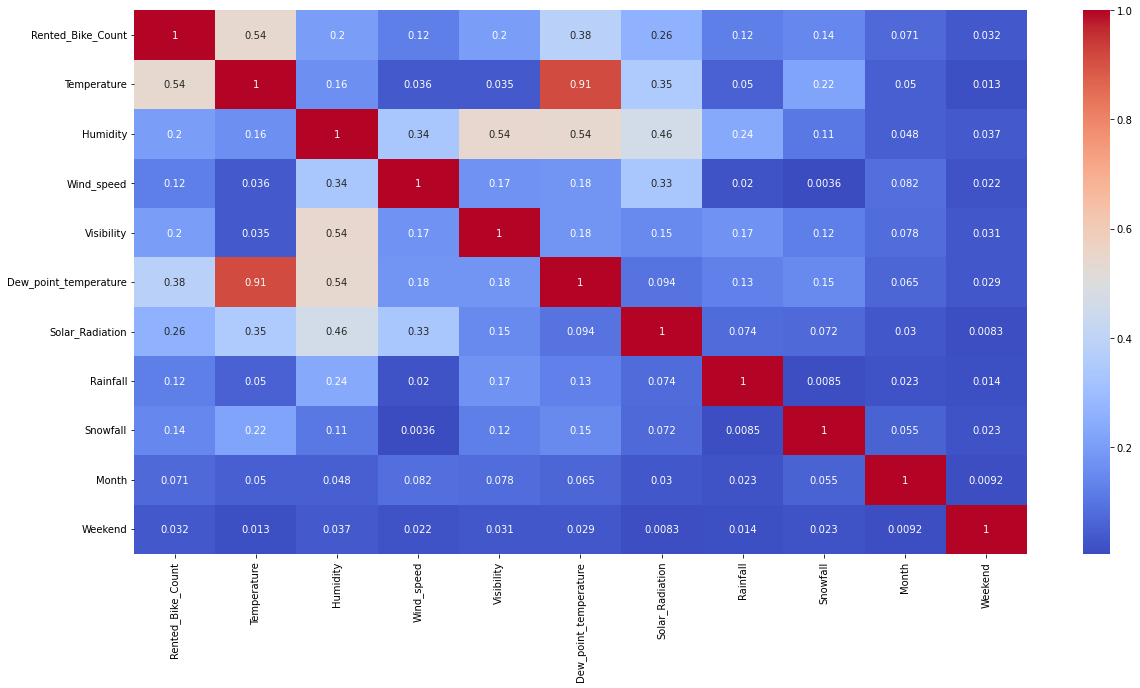

In [23]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

## Since Dew Point Temperature has a very high correlation with temperature, as expected, we drop it from our dataset

In [24]:
df = df.drop('Dew_point_temperature',axis = 1)

## We make dummy variables for the categorical features

In [25]:
df = pd.get_dummies(df,columns=['Seasons'],prefix='Season',drop_first=True)

In [26]:
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [27]:
df = pd.get_dummies(df, columns = ['Hour'],prefix = 'Hour',drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
X = df.drop('Rented_Bike_Count', axis = 1)
y = df['Rented_Bike_Count']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 10)

# Standardizing the data

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5256, 36)
(5256,)
(3504, 36)
(3504,)


# Model Training

## Linear Regression

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Model R-Square : ", r2_score(y_test,y_pred))

Model R-Square :  0.5965122965802696


In [65]:
model.intercept_

707.3342988584086

In [66]:
model.coef_

array([ 2.45005735e+02, -1.36860428e+02, -6.23765800e+00,  1.35819181e+00,
        6.48549939e+01, -7.27752553e+01,  1.00928918e+01, -3.09908463e+01,
        1.77982973e+01, -2.03534236e+01, -3.02942689e+01, -2.00622410e-01,
       -1.21552371e+02, -1.66984359e+01, -4.14075339e+01, -5.52650794e+01,
       -6.73917122e+01, -6.59099847e+01, -3.60630482e+01,  2.48085077e+01,
        8.47628463e+01,  1.05860107e+01, -3.70216828e+01, -3.97087965e+01,
       -3.44770808e+01, -3.27031542e+01, -3.45370160e+01, -1.28483056e+01,
        1.61901279e+01,  6.91183804e+01,  1.53878411e+02,  1.14905691e+02,
        9.18728963e+01,  9.06647746e+01,  7.11652219e+01,  2.26584478e+01])

In [67]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
Temperature,245.005735
Humidity,-136.860428
Wind_speed,-6.237658
Visibility,1.358192
Solar_Radiation,64.854994
Rainfall,-72.775255
Snowfall,10.092892
Holiday,-30.990846
Month,17.798297
Weekend,-20.353424


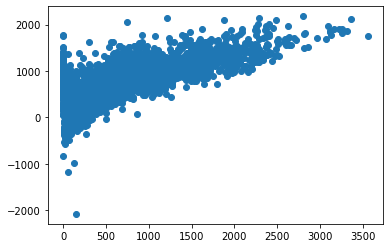

In [68]:
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Density'>

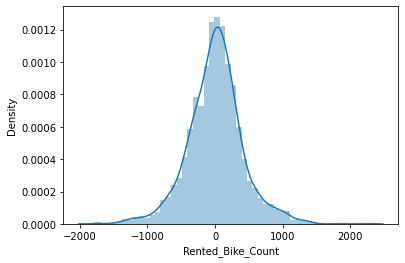

In [69]:
sns.distplot(y_test-y_pred)

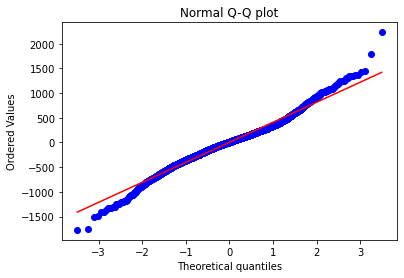

In [70]:
import scipy.stats as stats

stats.probplot(y_test-y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

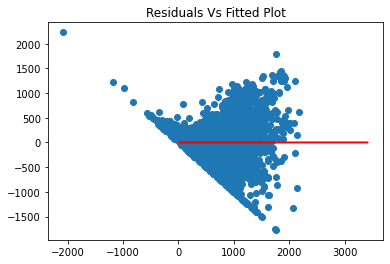

In [71]:
plt.scatter(y_pred, y_test-y_pred)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

### As expected, our assumptions of linear regression are not met

## Decision Tree Regressor

In [72]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Model R-Square :",r2_score(y_test,y_pred))

Model R-Square : 0.5462564254335383


In [73]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
tuning_model=GridSearchCV(model,param_grid=parameters,scoring='r2',cv=10)

In [60]:
tuning_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [61]:
tuning_model.best_score_

0.6866641428006761

## Random Forest Regressor

In [80]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Model R-Square :",r2_score(y_test,y_pred))

Model R-Square : 0.7848977721949606


# Random Forest Regressor gives the best R-squared score out of the box